In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target.copy()

In [3]:
# 转化为二分类问题
y[y!=0] = 1

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_predict = logistic_regression.predict(X_test)
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [5]:
decision_scores = logistic_regression.decision_function(X_test)
decision_scores

array([ 4.52754708,  6.87819785,  1.76626704,  6.52382721, -3.69894208,
        3.62432582,  4.56308405,  6.90953592,  5.03259757,  4.32814348,
        4.65190775, -3.4406931 , -3.38774403, -3.39770458,  9.14447268,
        3.55687964, -5.19861539,  8.64268233,  7.05727385,  7.23922648,
        5.13145067, -3.75815509, 11.76549329, -3.89461019,  4.27746243,
        4.01246718, -4.24926017,  3.78780538,  8.75298289,  9.69297511,
       -4.01158816, -3.69589243,  3.69030453,  7.14112807,  1.0819265 ,
        5.36425737,  7.39993573, 10.56300377])

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_scores = []
recall_scores = []
thresholds = np.sort(decision_scores)
for threshold in thresholds:
    y_predict = np.array(decision_scores>=threshold,dtype='int')
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    precision_scores.append(precision)
    recall_scores.append(recall)  

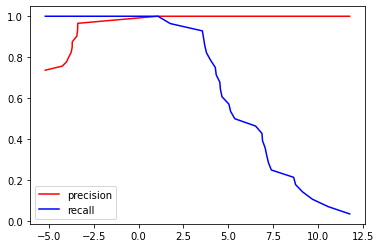

In [7]:
plt.plot(thresholds, precision_scores, color='r',label="precision")
plt.plot(thresholds, recall_scores, color='b',label="recall")
plt.legend()
plt.show()

# Precision-Recall 曲线

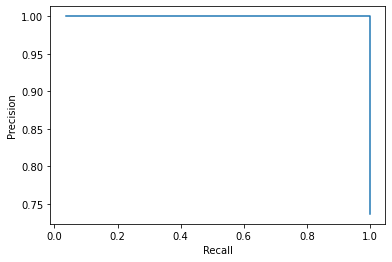

In [8]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# scikit-learn中的PR曲线

In [9]:
from sklearn.metrics import precision_recall_curve

precision_scores, recall_scores,thresholds =  precision_recall_curve(y_test,decision_scores)

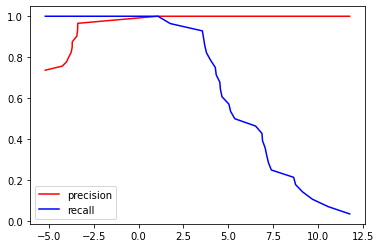

In [10]:
plt.plot(thresholds, precision_scores[:-1], color='r',label="precision")
plt.plot(thresholds, recall_scores[:-1], color='b',label="recall")
plt.legend()
plt.show()

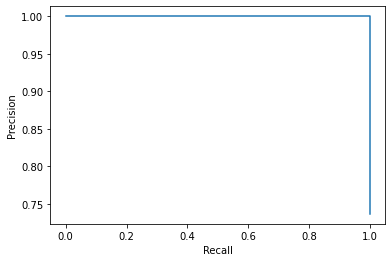

In [11]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# scikit-learn中的ROC曲线

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,decision_scores)

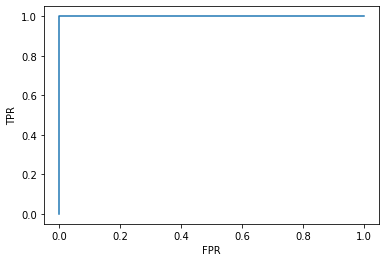

In [13]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# AUC
area under curve

In [14]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,decision_scores)
auc

1.0